In [1]:
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

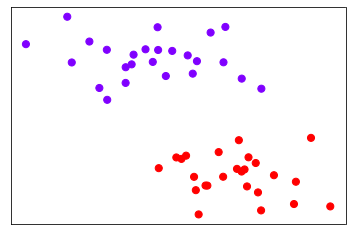

In [3]:
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.6)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')
plt.xticks([])
plt.yticks([])
plt.show()

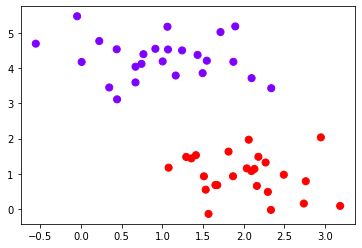

In [4]:
# 首先要有散点图
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="rainbow")
ax = plt.gca()  # 获取当前的子图，如果不存在，则创建新的子图

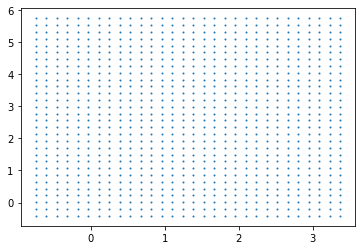

In [5]:
# 获取平面上两条坐标轴的最大值和最小值
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# 在最大值和最小值之间形成30个规律的数据
axisx = np.linspace(xlim[0], xlim[1], 30)
axisy = np.linspace(ylim[0], ylim[1], 30)

axisy, axisx = np.meshgrid(axisy, axisx)
# 我们将使用这里形成的二维数组作为我们contour函数中的X和Y
# 使用meshgrid函数将两个一维向量转换为特征矩阵
# 核心是将两个特征向量广播，以便获取y.shape * x.shape这么多个坐标点的横坐标和纵坐标

xy = np.vstack([axisx.ravel(), axisy.ravel()]).T
# 其中ravel()是降维函数，vstack能够将多个结构一致的一维数组按行堆叠起来
# xy就是已经形成的网格，它是遍布在整个画布上的密集的点

plt.scatter(xy[:, 0], xy[:, 1], s=1, cmap="rainbow")

In [6]:
# 理解函数meshgrid和vstack的作用
a = np.array([1, 2, 3])
b = np.array([7, 8])
# 两两组合，会得到多少个坐标？
# 答案是6个，分别是 (1,7),(2,7),(3,7),(1,8),(2,8),(3,8)

v1, v2 = np.meshgrid(a, b)

v1

array([[1, 2, 3],
       [1, 2, 3]])

In [7]:
v2

array([[7, 7, 7],
       [8, 8, 8]])

In [8]:
v = np.vstack([v1.ravel(), v2.ravel()]).T
v

array([[1, 7],
       [2, 7],
       [3, 7],
       [1, 8],
       [2, 8],
       [3, 8]])

In [12]:
# 建模，通过fit计算出对应的决策边界
clf = SVC(kernel="linear").fit(X, y)  # 计算出对应的决策边界
Z = clf.decision_function(xy)
# 重要接口decision_function，返回每个输入的样本所对应的到决策边界的距离
# 然后再将这个距离转换为axisx的结构，这是由于画图的函数contour要求Z的结构必须与X和Y保持一致
Z.shape

(900,)

In [13]:
Z = Z.reshape(axisx.shape)
Z.shape

(30, 30)

(-0.41872382476349596, 5.754870487889891)

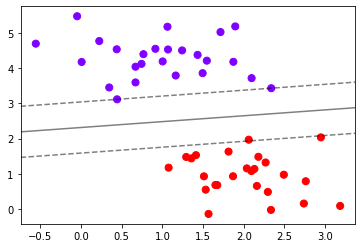

In [19]:
# 首先要有散点图
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="rainbow")
ax = plt.gca()  # 获取当前的子图，如果不存在，则创建新的子图
# 画决策边界和平行于决策边界的超平面
ax.contour(axisx, axisy, Z,
           colors="k",
           levels=[-1, 0, 1],  # 画三条等高线，分别是Z为-1，Z为0和Z为1的三条线
           alpha=0.5,  # 透明度
           linestyles=["--", "-", "--"]
           )

ax.set_xlim(xlim)  # 设置x轴取值
ax.set_ylim(ylim)

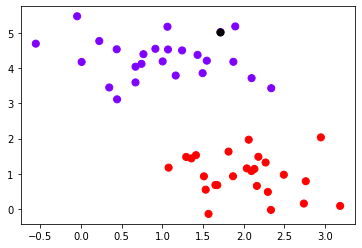

In [20]:
# 记得Z的本质么？是输入的样本到决策边界的距离，而contour函数中的level其实是输入了这个距离
# 让我们用一个点来试试看
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="rainbow")
plt.scatter(X[10, 0], X[10, 1], c="black", s=50, cmap="rainbow")

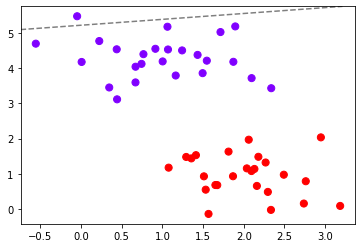

In [25]:
clf.decision_function(X[10].reshape(1, 2))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="rainbow")
ax = plt.gca()
ax.contour(axisx, axisy, Z, colors="k",
           levels=[-4], alpha=0.5, linestyles=["--"])

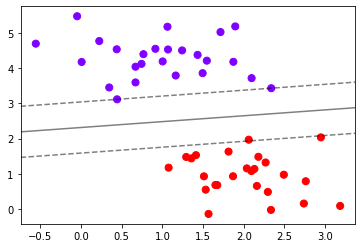

In [41]:
# 将上述过程包装成函数：
def plot_svc_decision_function(model, ax=None):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    ax.contour(X, Y, P, colors="k",
               levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"])
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)


# 则整个绘图过程可以写作：
clf = SVC(kernel="linear").fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="rainbow")
plot_svc_decision_function(clf)

In [42]:
clf.predict(X)
# 根据决策边界，对X中的样本进行分类，返回的结构为n_samples

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0])

In [43]:
clf.score(X, y)
# 返回给定测试数据和标签的平均准确度

1.0

In [44]:
clf.support_vectors_
# 返回支持向量坐标

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

In [45]:
clf.n_support_  # array([2, 1])
# 返回每个类中支持向量的个数

array([2, 1], dtype=int32)

## 推广到非线性情况

In [47]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=0.1, noise=.1)

X.shape

(100, 2)

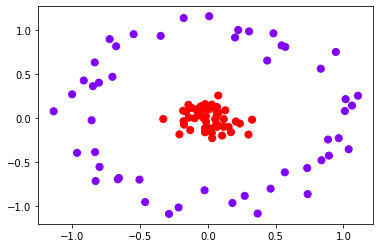

In [46]:
y.shape

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="rainbow")
plt.show()

0.67

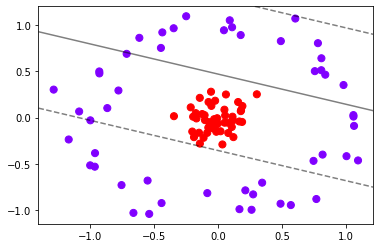

In [48]:
clf = SVC(kernel="linear").fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="rainbow")
plot_svc_decision_function(clf)
clf.score(X, y)

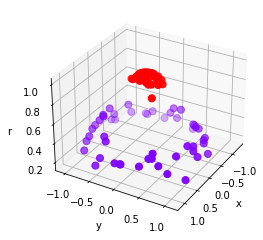

In [49]:
# 定义一个由x计算出来的新维度r
from mpl_toolkits import mplot3d
r = np.exp(-(X**2).sum(1))

rlim = np.linspace(min(r), max(r), 100)


# 定义一个绘制三维图像的函数
# elev表示上下旋转的角度
# azim表示平行旋转的角度
def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection="3d")
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='rainbow')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("r")
    plt.show()


plot_3D()

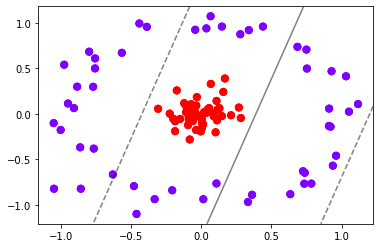

interactive(children=(Dropdown(description='elev', index=1, options=(0, 30, 60, 90), value=30), IntSlider(valu…

In [51]:
# 如果放到jupyter notebook中运行
from ipywidgets import interact, fixed
from mpl_toolkits import mplot3d
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_circles
X, y = make_circles(100, factor=0.1, noise=.1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="rainbow")


def plot_svc_decision_function(model, ax=None):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    ax.contour(X, Y, P, colors="k",
               levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"])
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)


clf = SVC(kernel="linear").fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="rainbow")
plot_svc_decision_function(clf)

r = np.exp(-(X**2).sum(1))

rlim = np.linspace(min(r), max(r), 100)


def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection="3d")
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='rainbow')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("r")
    plt.show()


interact(plot_3D, elev=[0, 30, 60, 90],
         azip=(-180, 180), X=fixed(X), y=fixed(y))
plt.show()

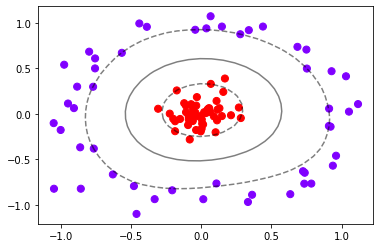

In [52]:
clf = SVC(kernel="rbf").fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="rainbow")
plot_svc_decision_function(clf)